<a href="https://colab.research.google.com/github/alexdoyle115/C7082_Assignment/blob/main/Model%20including%20all%20images%20and%20augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying wheat leaf disease using convolutional neural networks  

---



### Table of Contents

1.   Background
2.   Methods
3.   Results
4.   Discussion
5.   Literiture

### 1. Background

<p align = "justify">*Puccina triticina* is a fungal disease of affecting a range of crops but most notably wheat crops worldwide. Also known as brown leaf rust it is widely recognised a one of the most important diseases, causing around a 4% reduction in yield reduction worldwide (Dulleiller et al., 2007) but reductions in up to 50% have been recorded(Draz et al, 2015). While leaf rusts have a complex lifestyle with both sexual and asexual reproduction aswell as multiple hosts. For the purposes of this analysis the lifecycle is beyond the scope of this analysis. Importantly it occurs on the leaf blade with infections appearing as small round pustules with a orange brown colour surrounded by a yellow ring of chlorotic leaf tissue, these very idendtifiable pustlues contain the spores.</p>

<p align = "justify">There are 2 main methods of controlling brown rust in fields, resistant varieties and chemical sprays. The use of resistant varieties is much more in line with the rational of modern farming techniques. The main issue with resistant varieties is the appearnace of new strains that can infect previously resist varieties. To combat this there are fungicides on the market that do offer control but it is important to ensure that their effictiveness is not impacted. </p>

<p align = "justify">To try and protect both cultural and chemicals controls effectiveness, it is key to utilise the pillars of Intergrated Pest Management(IPM). This can be better acheived with the use of modern technologies such as precision agriculture. The rise of precision agriculture has allowed farming to gather more detailed data on smaller and smaller areas.</p>

<p align = "justify">Accurate automated high-throughput phenotyping of plant diseases has the potential to aid crop management, speed up breeding, and contribute to fundamental and applied research efforts (Pauli et al. 2016).With companies like the small robot company being developed one could envision small mapping robots being used to travel the fields, identify high disease areas and highlight these regions for chemical control. A system like this would allow for improved diagnosis and better use of chemical fungicdes as well as removing the subjective nature from resistance scoring in crop trials (Bock et al. 2009).</p>  

<p align = "justify">While a system such as this may be seen in the future, there are a number of challenges for both the hardware and software to overcome. One such challenge is relaiably distinguishing between a diseased plant and other forms of damage (DeChant et al. 2017). Image based identification is the best way to approach such a problem, by using Convolutional Neural Networks(CNN) to extract useful features from images without needing manual feature engineering. Using a CNN to correctly identify the presesnce of a leaf rust infection on the surface of a leaf when only comaparing it to perfectly healthy leaves would be very simple but not very practical any discouloring of the leaf could lead to the an incorrect identifaction.</p>

<p align = "justify">To add a layer of practicality a third class is included in the data, leaves that are nitrogen deficient. Nitrogen deficiancy is the most common nutrient deficiency and results in paler green leaves with yellowing at the leaf tip reducing grain yield. </p>

<p align = "justify">The objective of this analysis is to correctly identify images of wheat leaves infected with leaf rust, leaves suffering with a nitrogen deficiency and leaves that are perfectly healthy. </p>







### 2. Methods 

####2.1 Data 

The data for this analysis consists of 1459 images of wheat leaves, split into 2 subsets Nitrogen Deficient(abiotic stress) and Rust(biotic stress) and further split outlined in Fig. 1. below(the number of images in each subset). 

Fig. 1.

Nitrogen Deficient | Rust 
---|---
**Train:** |
    N deficient (209)|Rust (258)
    Control (209)| Control(258)
**Test:** 
    N deficient (44)|Rust (54)
    Control (44)|Control (73)
**Validation:**
    N deficient (44)|Rust (54)
    Control (44)|Control(73) 



The data was collected with an RGB camera from a wheat crop sown in the winter 2019 and harvested in 2020, the fields were a part of the Indian Agriculture Research Institute. The leaf images were acquired at the booting stage of a wheat crop. After the pictures were taken, the images were segmented from the background using otsu-based masking(Arya et al. 2020).

The files for this analysis can be found at this [link](https://data.mendeley.com/datasets/th422bg4yd/1). 

####2.2 Convoltional Neural Network

In [8]:
# Importing the required packages
from google.colab import drive 

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import keras
keras.__version__

'2.4.3'

In [10]:
import os

import shutil

Setting up the directories

---
The directories were set up to include all files in a single folder divided according to train, test and validation as opposed to how they are set up originally which was divided by plants showing leaf rust and nitrogen deficiency as well as their accompying controls. This allows us to create and orginise the directories before filling them with the appropriate files. 

In [11]:
# Training images 
train_deficiency =('/content/gdrive/MyDrive/C7082_Assignment/Ndeficient/train/deficiency')
train_controlN = ('/content/gdrive/MyDrive/C7082_Assignment/Ndeficient/train/control')

train_diseased = ('/content/gdrive/MyDrive/C7082_Assignment/WheatLeafRust/train/diseased')
train_controlR = ('/content/gdrive/MyDrive/C7082_Assignment/WheatLeafRust/train/control')

# Testing images
test_deficiency = ('/content/gdrive/MyDrive/C7082_Assignment/Ndeficient/test/deficiency')
test_controlN = ('/content/gdrive/MyDrive/C7082_Assignment/Ndeficient/test/control')

test_diseased = ('/content/gdrive/MyDrive/C7082_Assignment/WheatLeafRust/test/diseased')
test_controlR = ('/content/gdrive/MyDrive/C7082_Assignment/WheatLeafRust/test/control')

# Validation images
val_deficiency = ('/content/gdrive/MyDrive/C7082_Assignment/Ndeficient/val/deficiency')
val_controlN = ('/content/gdrive/MyDrive/C7082_Assignment/Ndeficient/val/control')

val_diseased = ('/content/gdrive/MyDrive/C7082_Assignment/WheatLeafRust/val/diseased')
val_controlR = ('/content/gdrive/MyDrive/C7082_Assignment/WheatLeafRust/val/control')





In [13]:
# Creating a directory to work out of
cwd = os.getcwd()
NN_dir = '/content/gdrive/MyDrive/C7082_Assignment/NN1_dir'
os.mkdir(NN_dir)


In [14]:
# The training, validation and tests directories
train_dir = os.path.join(NN_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(NN_dir, 'val')
os.mkdir(val_dir)

test_dir = os.path.join(NN_dir, 'test')
os.mkdir(test_dir)

In [15]:
# The nitrogen deficent, leaf rust and control directories 
# Training directory
train_ndef_dir = os.path.join(train_dir, 'ndef')
os.mkdir(train_ndef_dir)

train_rust_dir = os.path.join(train_dir, 'rust')
os.mkdir(train_rust_dir)

train_control_dir = os.path.join(train_dir, 'control')
os.mkdir(train_control_dir)

# Test directories
test_ndef_dir = os.path.join(test_dir, 'ndef')
os.mkdir(test_ndef_dir)

test_rust_dir = os.path.join(test_dir, 'rust')
os.mkdir(test_rust_dir)

test_control_dir = os.path.join(test_dir, 'control')
os.mkdir(test_control_dir)

# Validation directories
val_ndef_dir = os.path.join(val_dir, 'ndef')
os.mkdir(val_ndef_dir)

val_rust_dir = os.path.join(val_dir, 'rust')
os.mkdir(val_rust_dir)

val_control_dir = os.path.join(val_dir, 'control')
os.mkdir(val_control_dir)

Now we need to fill the directories

In [16]:
# 1. Copy images into training directory (training)
fnames = ['{}.jpg'.format(i) for i in range(209)]
for fname in fnames:
  src = os.path.join(train_deficiency, fname)
  dst = os.path.join(train_ndef_dir, fname)
  shutil.copy(src, dst)

# 2. Nitrogen deficiency control images (training)
fnames = ['{}.jpg'.format(i) for i in range(208)]
for fname in fnames:
  src = os.path.join(train_controlN, fname)
  dst = os.path.join(train_control_dir, fname)
  shutil.copy(src, dst)

# 3. Leaf rust diseased images (training)
fnames = ['{}.jpg'.format(i) for i in range(258)]
for fname in fnames:
  src = os.path.join(train_diseased, fname)
  dst = os.path.join(train_rust_dir, fname)
  shutil.copy(src, dst)

# Renameing the images in the control directory to make room for the additional control images 
for i , filename in enumerate(os.listdir("/content/gdrive/MyDrive/C7082_Assignment/NN1_dir/train/control")):
    os.rename(train_control_dir + "/" + str(i) + ".jpg", train_control_dir + "/" + str(i + 258) + ".jpg")
    
# 4. Leaf rust control images (training) 
fnames = ['{}.jpg'.format(i) for i in range(258)]
for fname in fnames:
  src = os.path.join(train_controlR, fname)
  dst = os.path.join(train_control_dir, fname)
  shutil.copy(src, dst)

# 5. Nitrogen deficiency test images 
fnames = ['{}.jpg'.format(i) for i in range(44)]
for fname in fnames:
  src = os.path.join(test_deficiency, fname)
  dst = os.path.join(test_ndef_dir, fname)
  shutil.copy(src, dst)

# 6. Nitrogen deficency test control
fnames = ['{}.jpg'.format(i) for i in range(44)]
for fname in fnames:
  src = os.path.join(test_controlN, fname)
  dst = os.path.join(test_control_dir, fname)
  shutil.copy(src, dst)

# 7. Leaf rust test images 
fnames = ['{}.jpg'.format(i) for i in range(54)]
for fname in fnames:
  src = os.path.join(test_diseased, fname)
  dst = os.path.join(test_rust_dir, fname)
  shutil.copy(src, dst)

# Renameing the images in the control directory to make room for the additional control images 
for i , filename in enumerate(os.listdir("/content/gdrive/MyDrive/C7082_Assignment/NN1_dir/test/control")):
    os.rename(test_control_dir + "/" + str(i) + ".jpg", test_control_dir + "/" + str(i + 73) + ".jpg")
    break

# 8. Leaf rust test control
fnames = ['{}.jpg'.format(i) for i in range(73)]
for fname in fnames:
  src = os.path.join(test_controlR, fname)
  dst = os.path.join(test_control_dir, fname)
  shutil.copy(src, dst)

# 9. Nitrogen deficiency val 
fnames = ['{}.jpg'.format(i) for i in range(44)]
for fname in fnames:
  src = os.path.join(val_deficiency, fname)
  dst = os.path.join(val_ndef_dir, fname)
  shutil.copy(src, dst)

# 10. Nitrogen deficency val control
fnames = ['{}.jpg'.format(i) for i in range(44)]
for fname in fnames:
  src = os.path.join(val_controlN, fname)
  dst = os.path.join(val_control_dir, fname)
  shutil.copy(src, dst)

# 11. Leaf rust val
fnames = ['{}.jpg'.format(i) for i in range(54)]
for fname in fnames:
  src = os.path.join(val_diseased, fname)
  dst = os.path.join(val_rust_dir, fname)
  shutil.copy(src, dst)

# Renameing the images in the control directory to make room for the additional control images 
for i , filename in enumerate(os.listdir("/content/gdrive/MyDrive/C7082_Assignment/NN1_dir/val/control")):
    os.rename(val_control_dir + "/" + str(i) + ".jpg", val_control_dir + "/" + str(i + 73) + ".jpg")
    break

# 12. Leaf rust val control
fnames = ['{}.jpg'.format(i) for i in range(73)]
for fname in fnames:
  src = os.path.join(val_controlR, fname)
  dst = os.path.join(val_control_dir, fname)
  shutil.copy(src, dst)


In [17]:
print('total nitrogen deficeicent training images', len(os.listdir(train_control_dir)))

total nitrogen deficeicent training images 466


In [18]:
print('total diseased test images', len(os.listdir(test_rust_dir)))

total diseased test images 54


In [19]:
print('total control validation images', len(os.listdir(val_control_dir)))

total control validation images 74


#### The Neural Network

The neural network in this analysis is a basic covenet using alernating layers of 
* Conv2D - learns local patterns 
* Maxpooling - Extracting windows from the input feature map and outputting the max value in each channel
* Dense - learns global patterns in their feature input space

The model is based off the convolutional neural netwrok used to classify cat and dog images in "Deep Learning with Python" (Chollet, 2018), the binary classification problem uses hidden layers alernating between Conv2D and Maxpooling to identify local patterns such as edges, with dense layers to identify these local patterns. The main difference between my model and the dog and cat one is that the dog and cat one uses binary classification by ustilising the sigmoid activation. To correctly identify the 3 different classes (Nitrogen Deficient, Leaf Rust and Healthy) the 'softmax' activation is used with 3 classes. 
(Chollet, 2018)

In [20]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

Looking at the model summary we see the vaious layers along with depth and size of the feature maps. The feature size (148x148) is somewhat arbitrary and is decreasing though the max pooling layers while the feature depth starts at 33 increasing to 128 before flattening. In 'Deep learning with Python' it highlights that  'rmsprop' is a suitable optimizer for the majority of applications and breaks down the appropriate last-layer activation (for multiclass, single label classification the softmax activation and categorical_crossenthropy as the loss function)



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 128)       1

The optimizer and loss functions are 

In [22]:
from keras import optimizers

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Image Preprocessing


Using keras's prepossing.image packages it automatically converts the jpeg files from a RGB grid of pixels into tensors that are rescaled to be between 0 and 1 which works better in neural networks. 

In [23]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 but the training images will also be augmented through rotation, changing height and width zooming and through flipping.
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
# The test images are left alone
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need classification labels
        class_mode='categorical')

# The same process for the validation set 
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 933 images belonging to 3 classes.
Found 172 images belonging to 3 classes.


In [24]:
#Takes the samples of size 20 (batch size) iterativly for the model, the generator will do this endlessly therefor a 'break' is required to stop it. 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 3)


##### Running the model
Once the data is in a suitable format for the model, it is now fit our model using the `model.fit`. The data is being generated in batches of 20 inputs indefinatly, therefore the generator needs to know how many samples to to draw from the generator before declaring an epoch. In this case there are 722 training images(258 control, 258 

In [26]:
history = model.fit( train_generator,
                    steps_per_epoch=36, 
                    epochs = 25,
                    validation_data=validation_generator, 
                    validation_steps=2)

Epoch 1/25
36/36 [==============================] - 153s 4s/step - loss: 0.7718 - accuracy: 0.7055 - val_loss: 0.7283 - val_accuracy: 0.5750
Epoch 2/25
36/36 [==============================] - 152s 4s/step - loss: 0.7874 - accuracy: 0.7686 - val_loss: 0.6760 - val_accuracy: 0.7500
Epoch 3/25
36/36 [==============================] - 152s 4s/step - loss: 0.4044 - accuracy: 0.8750 - val_loss: 0.5126 - val_accuracy: 0.8000
Epoch 4/25
36/36 [==============================] - 151s 4s/step - loss: 0.4149 - accuracy: 0.8682 - val_loss: 0.6450 - val_accuracy: 0.7500
Epoch 5/25
36/36 [==============================] - 152s 4s/step - loss: 0.3454 - accuracy: 0.8948 - val_loss: 0.3450 - val_accuracy: 0.8750
Epoch 6/25
36/36 [==============================] - 152s 4s/step - loss: 0.3306 - accuracy: 0.9014 - val_loss: 0.1557 - val_accuracy: 0.9750
Epoch 7/25
36/36 [==============================] - 149s 4s/step - loss: 0.3802 - accuracy: 0.9018 - val_loss: 0.3156 - val_accuracy: 0.8500
Epoch 8/25
36

In [27]:
model.save('Rust_identifier_1')

INFO:tensorflow:Assets written to: Rust_identifier_1/assets


### 3. Results

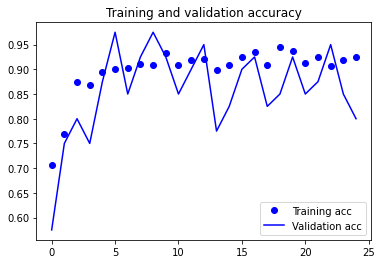

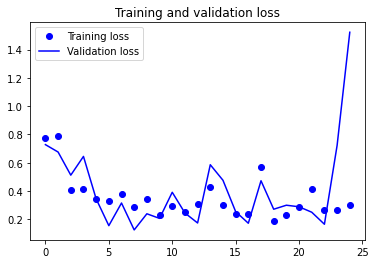

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
# The test images are left alone
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
        # This is the target directory
        test_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need classification labels
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 172 images belonging to 3 classes.
Found 172 images belonging to 3 classes.


In [36]:
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 3)


In [38]:
test_loss, test_acc = model.evaluate(test_generator, steps=17)
test_acc= (round(test_acc, 5)) * 100
print('test acc:', test_acc,'%')

17/17 [==============================] - 20s 1s/step - loss: 0.7164 - accuracy: 0.7765
test acc: 77.647 %


Using all available images in combination with the image augmentation not only resulted in much more noise and incosistency in the results as well as dramatically lower the test accuracy to 77% down from over 90%.  